In [1]:
from os import listdir
from time import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow import math
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

from utils import load_dataset, train

In [2]:
from tensorflow.config import list_physical_devices

assert len(list_physical_devices('GPU'))

In [3]:
def schedule(epoch, lr) -> float:
    if epoch >= 200 and epoch % 25 == 0:
        lr = lr * math.exp(-0.1)
    return lr

In [4]:
def plot_roc(y_true, y_score, boundaries: list):
    plt.title(f'ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    for boundary in boundaries:
        y = np.where(y_true > boundary, 0, 1)
        pred = np.where(y_score > boundary, 0, 1)

        fpr, tpr, thresholds = roc_curve(y, pred)
        plt.plot(fpr, tpr, label=f'bnd {boundary}')
    plt.legend()
    plt.show()
#     print(f'Thresholds: {thresholds}')

In [5]:
def auc(y_true, y_score, boundary: int):
    y = np.where(y_true > boundary, 0, 1)
    pred = np.where(y_score > boundary, 0, 1)

    return roc_auc_score(y, pred)

In [6]:
scheduler = LearningRateScheduler(schedule)
es = EarlyStopping(monitor='loss', patience=10, verbose=1)
optimizer = Adam(lr=1e-3)

epochs = 1500
validation_freq = 5
boundaries = [100, 300, 500, 1000, 2500, 5000]

-------------- Starting model_0 on noise 0 --------------
Epoch 00264: early stopping


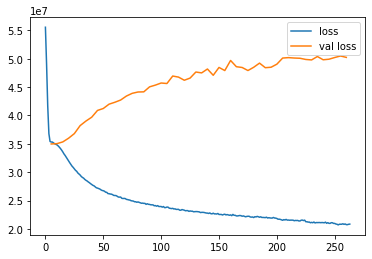

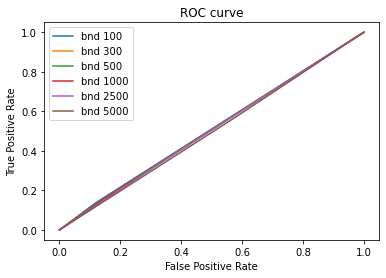

Boundary: 100	AUC: 0.50898
Boundary: 300	AUC: 0.50546
Boundary: 500	AUC: 0.50595
Boundary: 1000	AUC: 0.50523
Boundary: 2500	AUC: 0.50343
Boundary: 5000	AUC: 0.49584
Elapsed time: 16.61 minutes
-------------- Starting model_0 on noise 1 --------------
Epoch 00265: early stopping


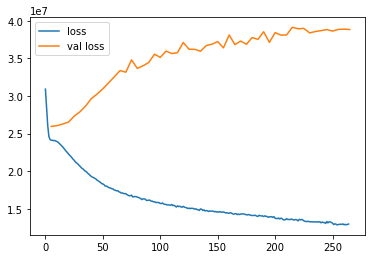

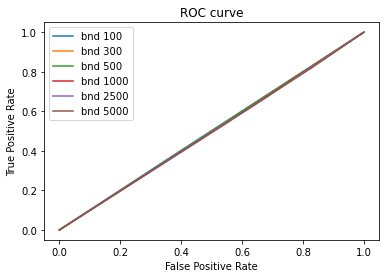

Boundary: 100	AUC: 0.50134
Boundary: 300	AUC: 0.49891
Boundary: 500	AUC: 0.49919
Boundary: 1000	AUC: 0.49575
Boundary: 2500	AUC: 0.49501
Boundary: 5000	AUC: 0.49564
Elapsed time: 48.71 minutes
-------------- Starting model_0 on noise 2 --------------
Epoch 00293: early stopping


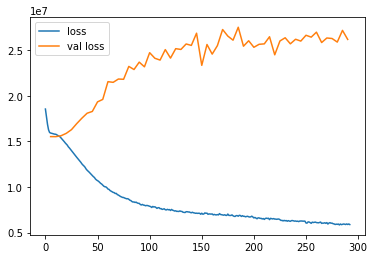

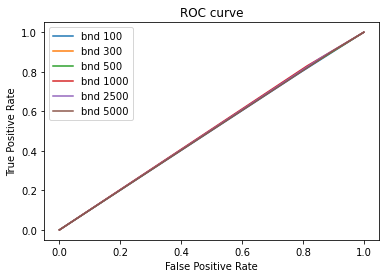

Boundary: 100	AUC: 0.50243
Boundary: 300	AUC: 0.50532
Boundary: 500	AUC: 0.50499
Boundary: 1000	AUC: 0.50800
Boundary: 2500	AUC: 0.50574
Boundary: 5000	AUC: 0.50333
Elapsed time: 71.33 minutes
-------------- Starting model_0 on noise 3 --------------
Epoch 00320: early stopping


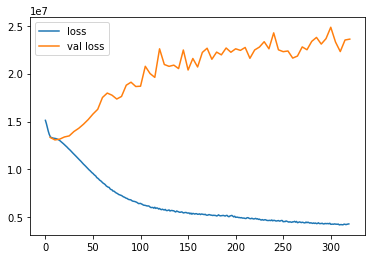

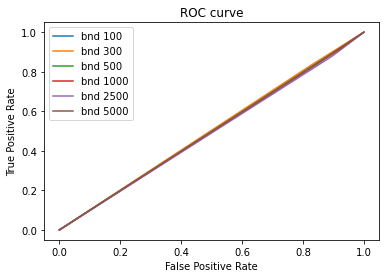

Boundary: 100	AUC: 0.50047
Boundary: 300	AUC: 0.50331
Boundary: 500	AUC: 0.49832
Boundary: 1000	AUC: 0.49701
Boundary: 2500	AUC: 0.49146
Boundary: 5000	AUC: 0.49608
Elapsed time: 88.98 minutes
-------------- Starting model_0 on noise 5 --------------
Epoch 00194: early stopping


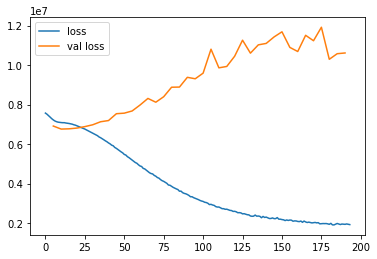

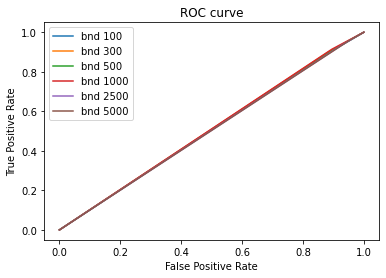

Boundary: 100	AUC: 0.50713
Boundary: 300	AUC: 0.50834
Boundary: 500	AUC: 0.50583
Boundary: 1000	AUC: 0.50943
Boundary: 2500	AUC: 0.50366
Boundary: 5000	AUC: 0.50317
Elapsed time: 99.92 minutes
-------------- Starting model_0 on noise 8 --------------
Epoch 00220: early stopping


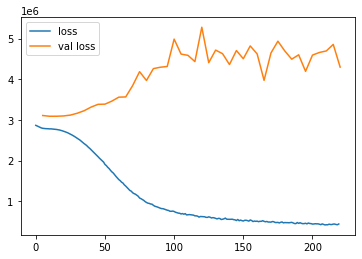

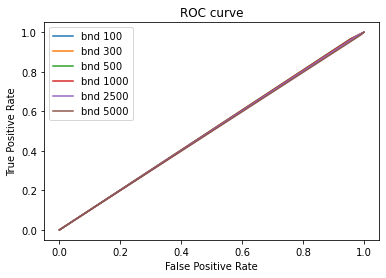

Boundary: 100	AUC: 0.50319
Boundary: 300	AUC: 0.50126
Boundary: 500	AUC: 0.50521
Boundary: 1000	AUC: 0.50457
Boundary: 2500	AUC: 0.50221
Boundary: 5000	AUC: 0.49795
Elapsed time: 112.10 minutes
-------------- Starting model_2 on noise 0 --------------
Epoch 00346: early stopping


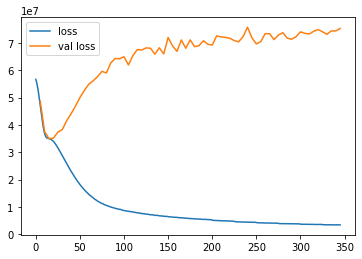

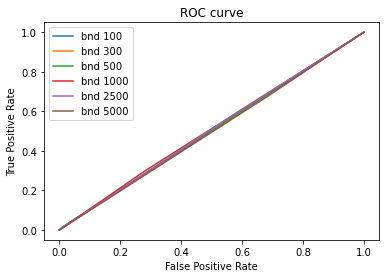

Boundary: 100	AUC: 0.50211
Boundary: 300	AUC: 0.50103
Boundary: 500	AUC: 0.50179
Boundary: 1000	AUC: 0.50861
Boundary: 2500	AUC: 0.50543
Boundary: 5000	AUC: 0.49597
Elapsed time: 130.61 minutes
-------------- Starting model_2 on noise 1 --------------
Epoch 00288: early stopping


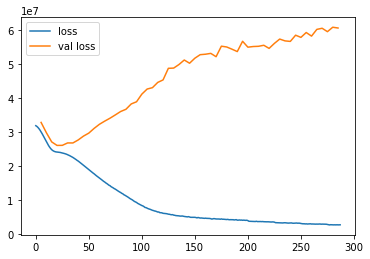

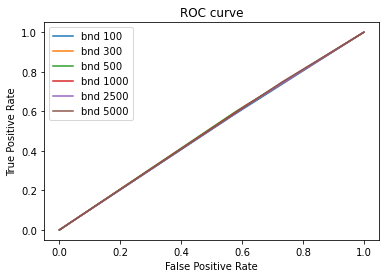

Boundary: 100	AUC: 0.50465
Boundary: 300	AUC: 0.50778
Boundary: 500	AUC: 0.50972
Boundary: 1000	AUC: 0.50845
Boundary: 2500	AUC: 0.50625
Boundary: 5000	AUC: 0.50842
Elapsed time: 146.01 minutes
-------------- Starting model_2 on noise 2 --------------
Epoch 00376: early stopping


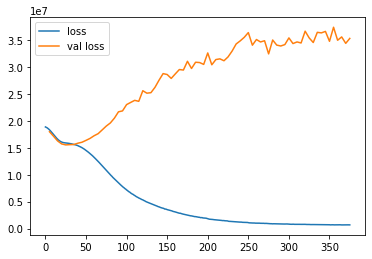

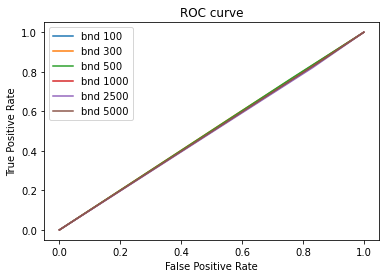

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50182
Boundary: 500	AUC: 0.50206
Boundary: 1000	AUC: 0.49704
Boundary: 2500	AUC: 0.49451
Boundary: 5000	AUC: 0.49756
Elapsed time: 166.02 minutes
-------------- Starting model_2 on noise 3 --------------
Epoch 00773: early stopping


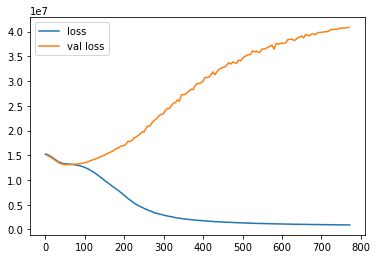

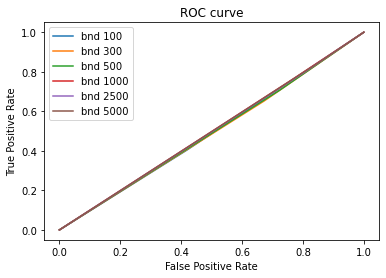

Boundary: 100	AUC: 0.49260
Boundary: 300	AUC: 0.48985
Boundary: 500	AUC: 0.49163
Boundary: 1000	AUC: 0.49791
Boundary: 2500	AUC: 0.49632
Boundary: 5000	AUC: 0.49730
Elapsed time: 207.57 minutes
-------------- Starting model_2 on noise 5 --------------
Epoch 00576: early stopping


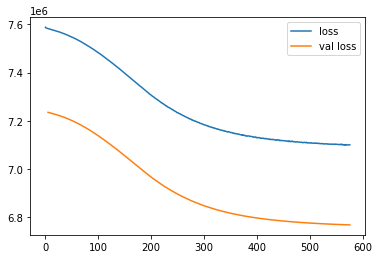

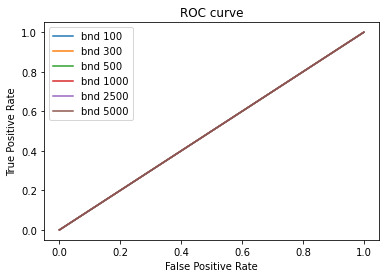

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 238.36 minutes
-------------- Starting model_2 on noise 8 --------------
Epoch 00779: early stopping


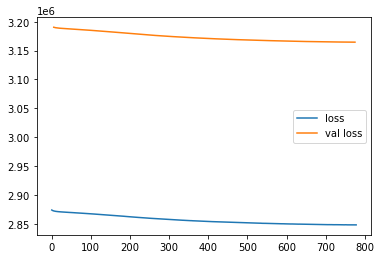

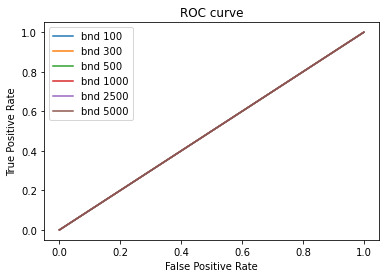

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 279.95 minutes
-------------- Starting model_3 on noise 0 --------------
Epoch 00608: early stopping


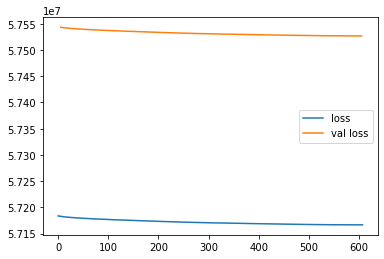

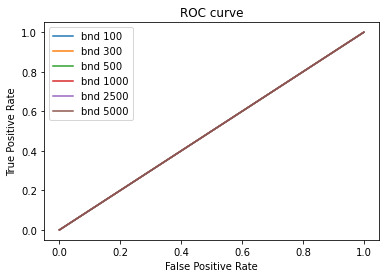

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 313.50 minutes
-------------- Starting model_3 on noise 1 --------------
Epoch 00242: early stopping


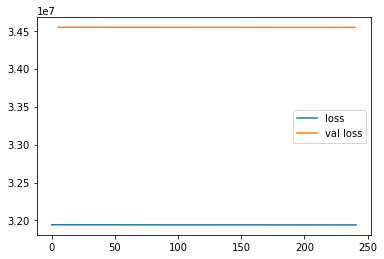

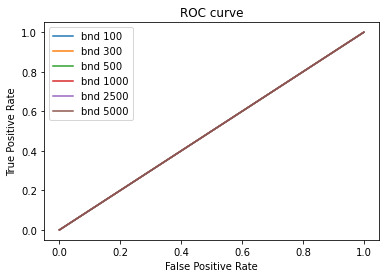

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 326.94 minutes
-------------- Starting model_3 on noise 2 --------------
Epoch 00208: early stopping


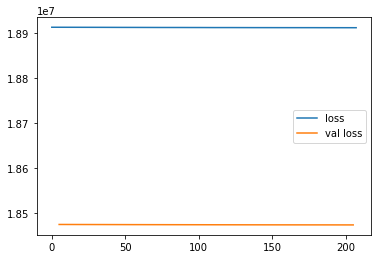

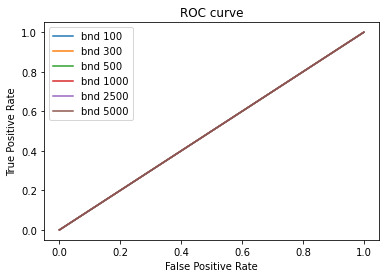

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 338.59 minutes
-------------- Starting model_3 on noise 3 --------------
Epoch 00247: early stopping


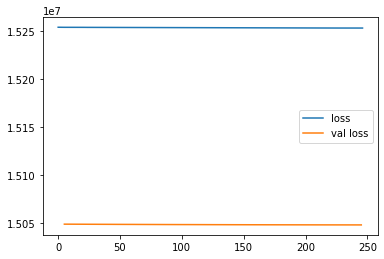

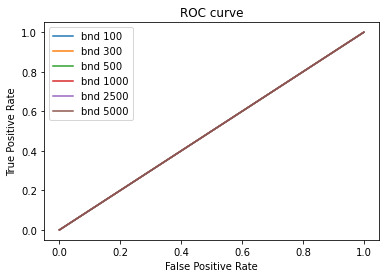

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 352.37 minutes
-------------- Starting model_3 on noise 5 --------------
Epoch 00119: early stopping


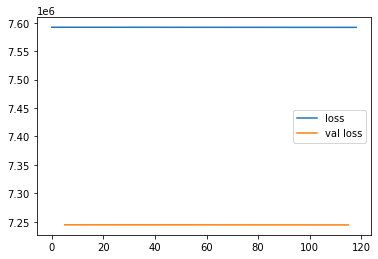

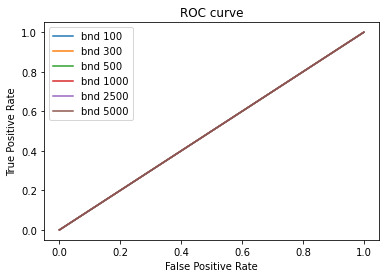

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 359.02 minutes
-------------- Starting model_3 on noise 8 --------------
Epoch 00187: early stopping


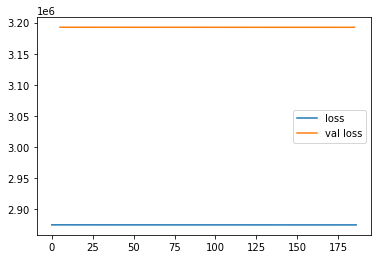

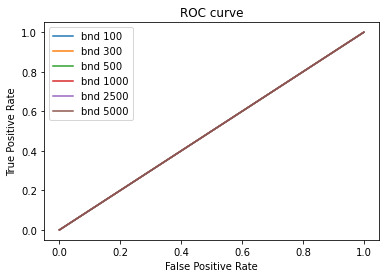

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 369.57 minutes
-------------- Starting model_1 on noise 0 --------------
Epoch 00359: early stopping


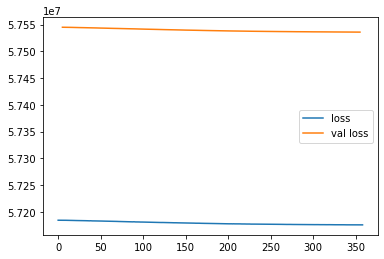

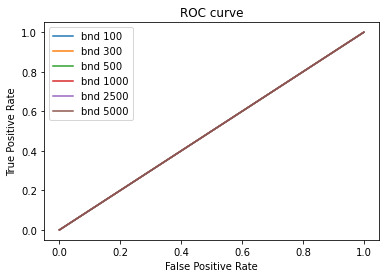

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 389.30 minutes
-------------- Starting model_1 on noise 1 --------------
Epoch 00012: early stopping


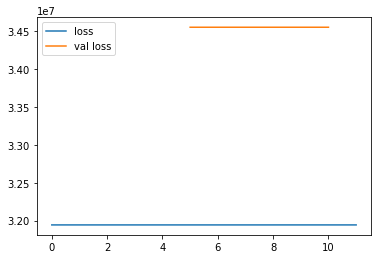

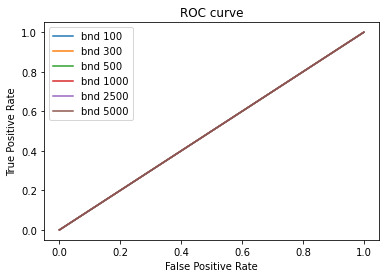

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 390.05 minutes
-------------- Starting model_1 on noise 2 --------------
Epoch 00307: early stopping


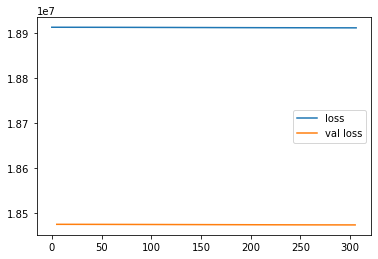

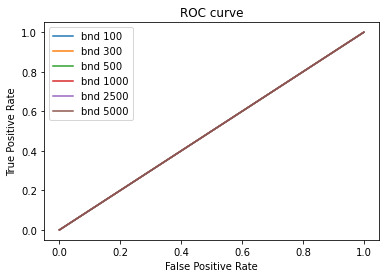

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 406.95 minutes
-------------- Starting model_1 on noise 3 --------------
Epoch 00025: early stopping


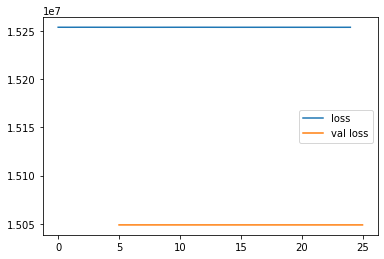

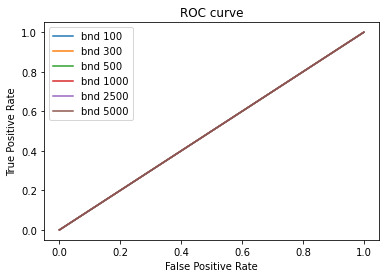

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 408.42 minutes
-------------- Starting model_1 on noise 5 --------------
Epoch 00016: early stopping


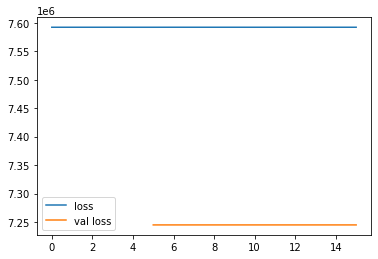

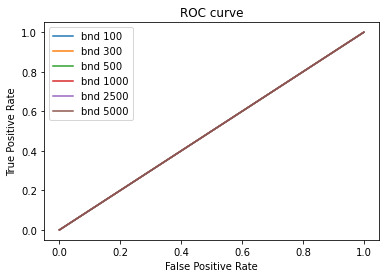

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 409.39 minutes
-------------- Starting model_1 on noise 8 --------------
Epoch 00018: early stopping


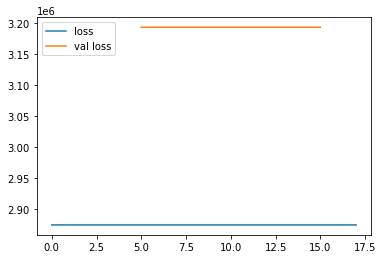

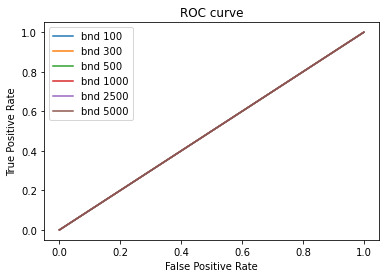

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 410.45 minutes
-------------- Starting model_4 on noise 0 --------------
Epoch 00026: early stopping


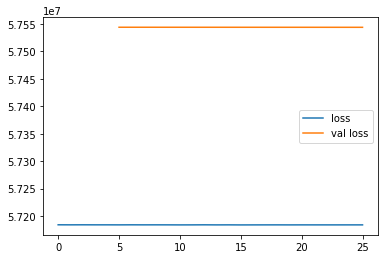

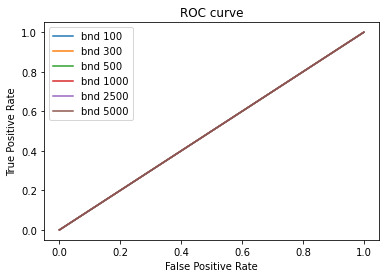

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 411.99 minutes
-------------- Starting model_4 on noise 1 --------------
Epoch 00048: early stopping


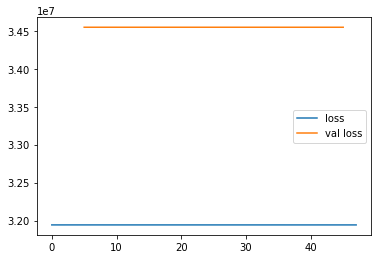

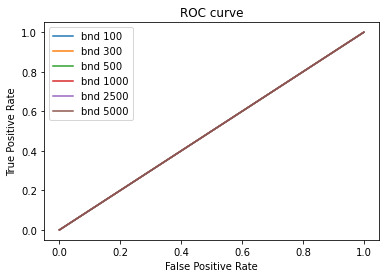

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 414.71 minutes
-------------- Starting model_4 on noise 2 --------------
Epoch 00068: early stopping


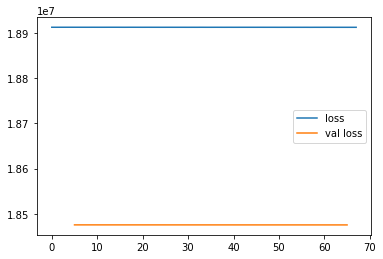

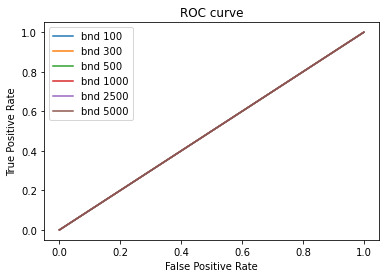

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 418.55 minutes
-------------- Starting model_4 on noise 3 --------------
Epoch 00039: early stopping


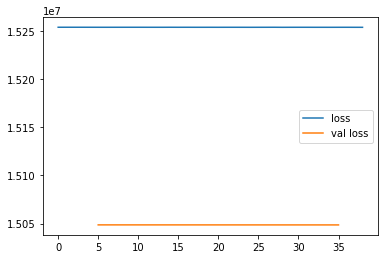

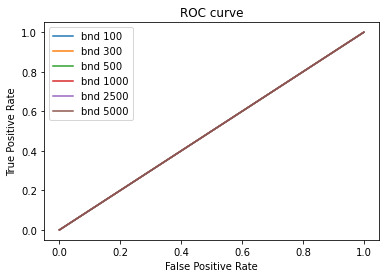

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 420.77 minutes
-------------- Starting model_4 on noise 5 --------------
Epoch 00020: early stopping


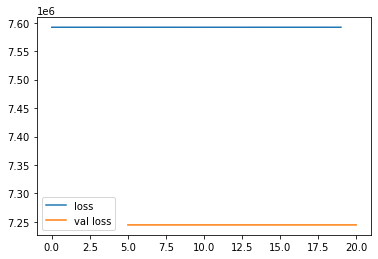

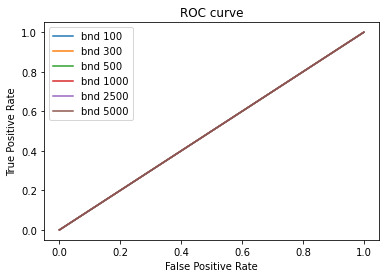

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 421.95 minutes
-------------- Starting model_4 on noise 8 --------------
Epoch 00014: early stopping


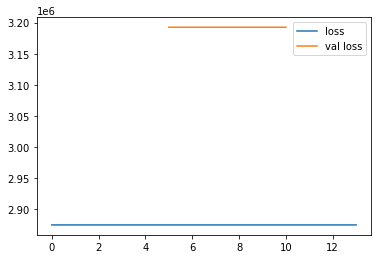

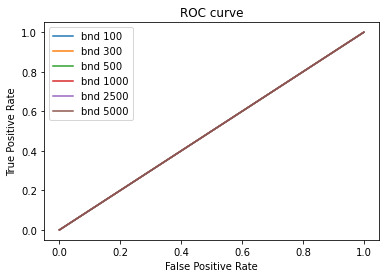

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
Elapsed time: 422.79 minutes
CPU times: user 10h 13min 1s, sys: 58min 13s, total: 11h 11min 15s
Wall time: 7h 2min 47s


In [7]:
%%time
for fname in listdir('model_saves/eval_models'):
    for n in [0, 1, 2, 3, 5, 8]:
        start_time = time()
        print(f'-------------- Starting {fname.replace(".h5", "")} on noise {n} --------------')
        lstm = load_model(f'model_saves/eval_models/{fname}', compile=False)
        X_train, y_train, X_test, y_test = load_dataset(f'm{n}')

        model = train(dataset=(X_train, y_train, X_test, y_test),
                      model=lstm,
                      epochs=epochs,
                      verbose=0,
                      validation_freq=validation_freq,
                      optimizer=optimizer,
                      callbacks=[scheduler, es])

        plot_roc(y_test, model.predict(X_test), boundaries)
        for boundary in boundaries:
            print(f'Boundary: {boundary}\tAUC: {auc(y_test, model.predict(X_test), boundary):.5f}')

        model.save(f'model_saves/evals/{fname.replace(".h5", "")}-{n}.h5')
        print(f'Elapsed time: {(time() - start_time)/60:.2f} minutes')